## CSC 578 HW\#7 Intel Image Classification Competition (Fall 2023)

### Name: Jashwanth Neeli

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load the training data. Split into training 80% and validation 20%.

In [2]:
train_directory = '../input/csc-578-hw7-fall-2023/train'

img_height = 150
img_width = 150

train_dataset, valid_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',        # use names of subdirectories as target labels
    label_mode='categorical', # convert target class (int) to one-hot-vector
    validation_split=0.2,
    subset="both",
    seed=123,                 # use same random seed with valid_set
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
)

Found 13986 files belonging to 6 classes.
Using 11189 files for training.
Using 2797 files for validation.


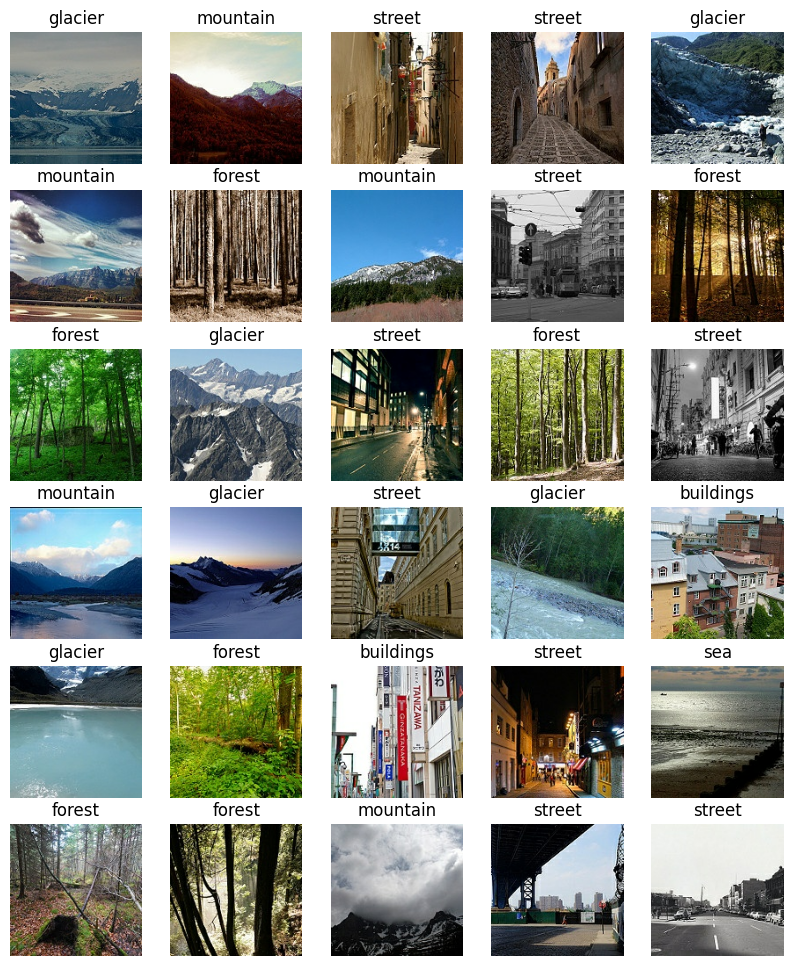

In [3]:
# Visualize some training examples.
plt.figure(figsize=(10, 12))
class_names = train_dataset.class_names
for images, labels in train_dataset.take(1):
    for i in range(30):
        ax = plt.subplot(6, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

### Define a model.

In [81]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])
newmodel1 = keras.Sequential(data_augmentation)

In [4]:
#MODEL0
# A relatively simple CNN model
model = keras.Sequential()
model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [5]:
# Print model summary to ensure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0

In [6]:
# Fit the model.  We train for 3 epochs for now.
history = model.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 24s 43ms/step - loss: 1.2676 - accuracy: 0.5714 - val_loss: 0.9966 - val_accuracy: 0.6185
Epoch 2/3
350/350 [==============================] - 6s 17ms/step - loss: 0.8220 - accuracy: 0.6943 - val_loss: 0.7410 - val_accuracy: 0.7315
Epoch 3/3
350/350 [==============================] - 7s 19ms/step - loss: 0.6597 - accuracy: 0.7602 - val_loss: 0.7105 - val_accuracy: 0.7319


In [7]:
#MODEL1 changing the layer sixe and kernel size
# A relatively simple CNN model
model1 = keras.Sequential()
model1.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model1.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model1.add(keras.layers.MaxPooling2D(2,2))
model1.add(keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model1.add(keras.layers.MaxPooling2D(2,2))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model1.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
# Print model summary to ensure
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20736)            

In [9]:
# Fit the model.  We train for 3 epochs for now.
history1 = model1.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 8s 19ms/step - loss: 0.9973 - accuracy: 0.6259 - val_loss: 0.9668 - val_accuracy: 0.6453
Epoch 2/3
350/350 [==============================] - 7s 19ms/step - loss: 0.6876 - accuracy: 0.7506 - val_loss: 0.7091 - val_accuracy: 0.7476
Epoch 3/3
350/350 [==============================] - 7s 19ms/step - loss: 0.4866 - accuracy: 0.8266 - val_loss: 0.7610 - val_accuracy: 0.7479


In [10]:
#MODEL2 changing the layer sixe and kernel size
# A relatively simple CNN model
model2 = keras.Sequential()
model2.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model2.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model2.add(keras.layers.MaxPooling2D(2,2))
model2.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model2.add(keras.layers.MaxPooling2D(2,2))

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model2.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
# Print model summary to ensure
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 41472)            

In [12]:
# Fit the model.  We train for 3 epochs for now.
history2 = model2.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 9s 21ms/step - loss: 1.2317 - accuracy: 0.5575 - val_loss: 0.8975 - val_accuracy: 0.6604
Epoch 2/3
350/350 [==============================] - 7s 18ms/step - loss: 0.8178 - accuracy: 0.6976 - val_loss: 0.8432 - val_accuracy: 0.6929
Epoch 3/3
350/350 [==============================] - 6s 17ms/step - loss: 0.6753 - accuracy: 0.7585 - val_loss: 0.8007 - val_accuracy: 0.7115


### Visualize Training (accuracy and loss)

In [13]:
#MODEL3 changing the layer sixe and kernel size
# A relatively simple CNN model
model3 = keras.Sequential()
model3.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model3.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model3.add(keras.layers.MaxPooling2D(2,2))
model3.add(keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model3.add(keras.layers.MaxPooling2D(2,2))

model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(128, activation='relu'))
model3.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model3.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
# Print model summary to ensure
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 70, 70, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 78400)            

In [15]:
# Fit the model.  We train for 3 epochs for now.
history3 = model3.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 9s 21ms/step - loss: 1.0799 - accuracy: 0.5765 - val_loss: 0.9595 - val_accuracy: 0.6225
Epoch 2/3
350/350 [==============================] - 7s 19ms/step - loss: 0.7080 - accuracy: 0.7356 - val_loss: 0.7165 - val_accuracy: 0.7401
Epoch 3/3
350/350 [==============================] - 7s 19ms/step - loss: 0.5373 - accuracy: 0.8011 - val_loss: 0.7510 - val_accuracy: 0.7501


In [16]:
#MODEL4 changing the layer sixe and kernel size
# A relatively simple CNN model
model4 = keras.Sequential()
model4.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model4.add(keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model4.add(keras.layers.MaxPooling2D(2,2))
model4.add(keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model4.add(keras.layers.MaxPooling2D(2,2))

model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(128, activation='relu'))
model4.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model4.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [17]:
# Print model summary to ensure
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 146, 146, 64)      4864      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 69, 69, 64)        102464    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 73984)            

In [18]:
# Fit the model.  We train for 3 epochs for now.
history4 = model4.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 11s 25ms/step - loss: 1.0900 - accuracy: 0.5656 - val_loss: 0.9311 - val_accuracy: 0.6471
Epoch 2/3
350/350 [==============================] - 8s 23ms/step - loss: 0.7797 - accuracy: 0.7072 - val_loss: 0.7421 - val_accuracy: 0.7311
Epoch 3/3
350/350 [==============================] - 8s 24ms/step - loss: 0.5943 - accuracy: 0.7818 - val_loss: 0.7566 - val_accuracy: 0.7397


In [19]:
#MODEL5 adding additional hidden layer
# A relatively simple CNN model
model5 = keras.Sequential()
model5.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model5.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model5.add(keras.layers.MaxPooling2D(2,2))
model5.add(keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model5.add(keras.layers.MaxPooling2D(2,2))
model5.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model5.add(keras.layers.MaxPooling2D(2,2))


model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(128, activation='relu'))
model5.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model5.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [20]:
# Print model summary to ensure
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 70, 70, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 35, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 33, 33, 32)       

In [21]:
# Fit the model.  We train for 3 epochs for now.
history5 = model5.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 9s 20ms/step - loss: 1.0276 - accuracy: 0.6020 - val_loss: 0.8265 - val_accuracy: 0.6957
Epoch 2/3
350/350 [==============================] - 7s 19ms/step - loss: 0.7297 - accuracy: 0.7372 - val_loss: 0.7184 - val_accuracy: 0.7358
Epoch 3/3
350/350 [==============================] - 7s 19ms/step - loss: 0.5728 - accuracy: 0.7876 - val_loss: 0.6053 - val_accuracy: 0.7823


In [22]:
#MODEL6 adding additional hidden layer and change the kernal size
# A relatively simple CNN model
model6 = keras.Sequential()
model6.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model6.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model6.add(keras.layers.MaxPooling2D(2,2))
model6.add(keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model6.add(keras.layers.MaxPooling2D(2,2))
model6.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model6.add(keras.layers.MaxPooling2D(2,2))


model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dense(128, activation='relu'))
model6.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model6.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [23]:
# Print model summary to ensure
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 70, 70, 64)        51264     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 35, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 33, 33, 64)       

In [24]:
# Fit the model.  We train for 3 epochs for now.
history6 = model6.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 9s 21ms/step - loss: 1.0141 - accuracy: 0.6054 - val_loss: 0.9432 - val_accuracy: 0.6446
Epoch 2/3
350/350 [==============================] - 7s 19ms/step - loss: 0.8200 - accuracy: 0.7298 - val_loss: 0.8767 - val_accuracy: 0.6965
Epoch 3/3
350/350 [==============================] - 7s 20ms/step - loss: 0.6768 - accuracy: 0.7891 - val_loss: 1.1483 - val_accuracy: 0.6157


In [25]:
#MODEL7 adding additional hidden layer and change the kernal size
# A relatively simple CNN model
model7 = keras.Sequential()
model7.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model7.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model7.add(keras.layers.MaxPooling2D(2,2))
model7.add(keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model7.add(keras.layers.MaxPooling2D(2,2))
model7.add(keras.layers.Conv2D(64, (5,5), activation = 'relu'))
model7.add(keras.layers.MaxPooling2D(2,2))


model7.add(keras.layers.Flatten())
model7.add(keras.layers.Dense(128, activation='relu'))
model7.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model7.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [26]:
# Print model summary to ensure
model7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 70, 70, 64)        51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 35, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 31, 31, 64)       

In [27]:
# Fit the model.  We train for 3 epochs for now.
history7 = model7.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 9s 20ms/step - loss: 1.0837 - accuracy: 0.5622 - val_loss: 0.8565 - val_accuracy: 0.6564
Epoch 2/3
350/350 [==============================] - 7s 20ms/step - loss: 0.8282 - accuracy: 0.6817 - val_loss: 0.7671 - val_accuracy: 0.7072
Epoch 3/3
350/350 [==============================] - 7s 20ms/step - loss: 0.6465 - accuracy: 0.7628 - val_loss: 0.6207 - val_accuracy: 0.7787


In [28]:
#MODEL8 adding padding
# A relatively simple CNN model
model8 = keras.Sequential()
model8.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model8.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu'))
model8.add(keras.layers.MaxPooling2D(2,2))
model8.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu'))
model8.add(keras.layers.MaxPooling2D(2,2))
model8.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu'))
model8.add(keras.layers.MaxPooling2D(2,2))


model8.add(keras.layers.Flatten())
model8.add(keras.layers.Dense(128, activation='relu'))
model8.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model8.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [29]:
# Print model summary to ensure
model8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 37, 37, 64)       

In [30]:
# Fit the model.  We train for 3 epochs for now.
history8 = model8.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 10s 22ms/step - loss: 0.9655 - accuracy: 0.6275 - val_loss: 0.7166 - val_accuracy: 0.7308
Epoch 2/3
350/350 [==============================] - 7s 21ms/step - loss: 0.6681 - accuracy: 0.7551 - val_loss: 0.6939 - val_accuracy: 0.7433
Epoch 3/3
350/350 [==============================] - 7s 21ms/step - loss: 0.5190 - accuracy: 0.8117 - val_loss: 0.5682 - val_accuracy: 0.7998


In [31]:
#MODEL9 adding strides
# A relatively simple CNN model
model9 = keras.Sequential()
model9.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model9.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu'))
model9.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model9.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu'))
model9.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model9.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu'))
model9.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))


model9.add(keras.layers.Flatten())
model9.add(keras.layers.Dense(128, activation='relu'))
model9.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model9.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [32]:
# Fit the model.  We train for 3 epochs for now.
history9 = model9.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 10s 21ms/step - loss: 1.0266 - accuracy: 0.5961 - val_loss: 0.7697 - val_accuracy: 0.6986
Epoch 2/3
350/350 [==============================] - 7s 20ms/step - loss: 0.6840 - accuracy: 0.7488 - val_loss: 0.6989 - val_accuracy: 0.7408
Epoch 3/3
350/350 [==============================] - 7s 21ms/step - loss: 0.5459 - accuracy: 0.7992 - val_loss: 0.5807 - val_accuracy: 0.7898


In [33]:
#MODEL10 adding one more hidden layer
# A relatively simple CNN model
model10 = keras.Sequential()
model10.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model10.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu'))
model10.add(keras.layers.MaxPooling2D(2,2))
model10.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu'))
model10.add(keras.layers.MaxPooling2D(2,2))
model10.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu'))
model10.add(keras.layers.MaxPooling2D(2,2))
model10.add(keras.layers.Conv2D(16, (3,3), padding='same',activation = 'relu'))
model10.add(keras.layers.MaxPooling2D(2,2))


model10.add(keras.layers.Flatten())
model10.add(keras.layers.Dense(128, activation='relu'))
model10.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model10.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
# Fit the model.  We train for 3 epochs for now.
history10 = model10.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 10s 22ms/step - loss: 1.0262 - accuracy: 0.5884 - val_loss: 0.8973 - val_accuracy: 0.6357
Epoch 2/3
350/350 [==============================] - 7s 21ms/step - loss: 0.7944 - accuracy: 0.6994 - val_loss: 0.6809 - val_accuracy: 0.7580
Epoch 3/3
350/350 [==============================] - 7s 20ms/step - loss: 0.6426 - accuracy: 0.7595 - val_loss: 0.7357 - val_accuracy: 0.7379


In [35]:
#MODEL10 adding one more hidden layer
# A relatively simple CNN model
model11 = keras.Sequential()
model11.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model11.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu'))
model11.add(keras.layers.MaxPooling2D(2,2))
model11.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu'))
model11.add(keras.layers.MaxPooling2D(2,2))
model11.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu'))
model11.add(keras.layers.MaxPooling2D(2,2))
model11.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu'))
model11.add(keras.layers.MaxPooling2D(2,2))


model11.add(keras.layers.Flatten())
model11.add(keras.layers.Dense(128, activation='relu'))
model11.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model11.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [36]:
# Fit the model.  We train for 3 epochs for now.
history11 = model11.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 10s 22ms/step - loss: 1.0393 - accuracy: 0.5792 - val_loss: 0.8354 - val_accuracy: 0.6882
Epoch 2/3
350/350 [==============================] - 8s 22ms/step - loss: 0.7286 - accuracy: 0.7387 - val_loss: 0.7124 - val_accuracy: 0.7512
Epoch 3/3
350/350 [==============================] - 8s 21ms/step - loss: 0.5719 - accuracy: 0.7951 - val_loss: 0.7945 - val_accuracy: 0.7226


In [37]:
#MODEL12 adding one more hidden layer
# A relatively simple CNN model
model12 = keras.Sequential()
model12.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model12.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu'))
model12.add(keras.layers.MaxPooling2D(2,2))
model12.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu'))
model12.add(keras.layers.MaxPooling2D(2,2))
model12.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu'))
model12.add(keras.layers.MaxPooling2D(2,2))
model12.add(keras.layers.Conv2D(64, (3,3), padding='same',activation = 'relu'))
model12.add(keras.layers.MaxPooling2D(2,2))


model12.add(keras.layers.Flatten())
model12.add(keras.layers.Dense(128, activation='relu'))
model12.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model12.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [38]:
# Fit the model.  We train for 3 epochs for now.
history12 = model12.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 10s 21ms/step - loss: 1.0320 - accuracy: 0.5917 - val_loss: 0.7979 - val_accuracy: 0.7222
Epoch 2/3
350/350 [==============================] - 6s 18ms/step - loss: 0.7182 - accuracy: 0.7293 - val_loss: 0.7066 - val_accuracy: 0.7529
Epoch 3/3
350/350 [==============================] - 7s 20ms/step - loss: 0.5740 - accuracy: 0.7917 - val_loss: 0.6259 - val_accuracy: 0.7966


In [39]:
#MODEL13 adding one more hidden layer
# A relatively simple CNN model
model13 = keras.Sequential()
model13.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model13.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu'))
model13.add(keras.layers.MaxPooling2D(2,2))
model13.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu'))
model13.add(keras.layers.MaxPooling2D(2,2))
model13.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu'))
model13.add(keras.layers.MaxPooling2D(2,2))
model13.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu'))
model13.add(keras.layers.MaxPooling2D(2,2))


model13.add(keras.layers.Flatten())
model13.add(keras.layers.Dense(128, activation='relu'))
model13.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model13.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [40]:
# Fit the model.  We train for 3 epochs for now.
history13 = model13.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 10s 21ms/step - loss: 1.0441 - accuracy: 0.5807 - val_loss: 0.8285 - val_accuracy: 0.6675
Epoch 2/3
350/350 [==============================] - 7s 21ms/step - loss: 0.7327 - accuracy: 0.7250 - val_loss: 0.6591 - val_accuracy: 0.7608
Epoch 3/3
350/350 [==============================] - 8s 22ms/step - loss: 0.5550 - accuracy: 0.7968 - val_loss: 0.5693 - val_accuracy: 0.7951


In [41]:
#MODEL14 adding regularization L1L2
from tensorflow.keras import regularizers
# A relatively simple CNN model
model14 = keras.Sequential()
model14.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model14.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model14.add(keras.layers.MaxPooling2D(2,2))
model14.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model14.add(keras.layers.MaxPooling2D(2,2))
model14.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model14.add(keras.layers.MaxPooling2D(2,2))


model14.add(keras.layers.Flatten())
model14.add(keras.layers.Dense(128, activation='relu'))
model14.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model14.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [42]:
# Fit the model.  We train for 3 epochs for now.
history14 = model14.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 9s 21ms/step - loss: 1.0599 - accuracy: 0.5937 - val_loss: 0.7876 - val_accuracy: 0.7161
Epoch 2/3
350/350 [==============================] - 7s 21ms/step - loss: 0.7615 - accuracy: 0.7309 - val_loss: 0.6792 - val_accuracy: 0.7630
Epoch 3/3
350/350 [==============================] - 7s 21ms/step - loss: 0.6281 - accuracy: 0.7823 - val_loss: 0.8026 - val_accuracy: 0.7286


In [43]:
#MODEL15 adding regularization L2
from tensorflow.keras import regularizers
# A relatively simple CNN model
model15 = keras.Sequential()
model15.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model15.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model15.add(keras.layers.MaxPooling2D(2,2))
model15.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model15.add(keras.layers.MaxPooling2D(2,2))
model15.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model15.add(keras.layers.MaxPooling2D(2,2))


model15.add(keras.layers.Flatten())
model15.add(keras.layers.Dense(128, activation='relu'))
model15.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model15.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [44]:
# Fit the model.  We train for 3 epochs for now.
history15 = model15.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 10s 22ms/step - loss: 0.9549 - accuracy: 0.6337 - val_loss: 0.7006 - val_accuracy: 0.7501
Epoch 2/3
350/350 [==============================] - 7s 20ms/step - loss: 0.6534 - accuracy: 0.7634 - val_loss: 0.5848 - val_accuracy: 0.7962
Epoch 3/3
350/350 [==============================] - 8s 21ms/step - loss: 0.5297 - accuracy: 0.8112 - val_loss: 0.5839 - val_accuracy: 0.7976


In [45]:
#MODEL16 adding regularization L1
from tensorflow.keras import regularizers
# A relatively simple CNN model
model16 = keras.Sequential()
model16.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model16.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model16.add(keras.layers.MaxPooling2D(2,2))
model16.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model16.add(keras.layers.MaxPooling2D(2,2))
model16.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model16.add(keras.layers.MaxPooling2D(2,2))


model16.add(keras.layers.Flatten())
model16.add(keras.layers.Dense(128, activation='relu'))
model16.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model16.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [46]:
# Fit the model.  We train for 3 epochs for now.
history16 = model16.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 10s 23ms/step - loss: 3.9067 - accuracy: 0.5606 - val_loss: 1.5349 - val_accuracy: 0.6028
Epoch 2/3
350/350 [==============================] - 8s 21ms/step - loss: 1.4713 - accuracy: 0.6231 - val_loss: 1.3341 - val_accuracy: 0.6546
Epoch 3/3
350/350 [==============================] - 8s 22ms/step - loss: 1.3227 - accuracy: 0.6449 - val_loss: 1.3224 - val_accuracy: 0.6418


In [47]:
#MODEL17 adding regularization L2 and dropout 
from tensorflow.keras import regularizers
# A relatively simple CNN model
model17 = keras.Sequential()
model17.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model17.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model17.add(keras.layers.MaxPooling2D(2,2))
model17.add(keras.layers.SpatialDropout2D(0.2))
model17.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model17.add(keras.layers.MaxPooling2D(2,2))
model17.add(keras.layers.SpatialDropout2D(0.2))
model17.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model17.add(keras.layers.MaxPooling2D(2,2))
model17.add(keras.layers.SpatialDropout2D(0.2))


model17.add(keras.layers.Flatten())
model17.add(keras.layers.Dense(128, activation='relu'))
model17.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model17.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [48]:
# Fit the model.  We train for 3 epochs for now.
history17 = model17.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3


2023-11-12 23:19:58.686493: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_17/spatial_dropout2d/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


350/350 [==============================] - 11s 27ms/step - loss: 1.1433 - accuracy: 0.5484 - val_loss: 0.8626 - val_accuracy: 0.6657
Epoch 2/3
350/350 [==============================] - 11s 30ms/step - loss: 0.8595 - accuracy: 0.6709 - val_loss: 0.7493 - val_accuracy: 0.7193
Epoch 3/3
350/350 [==============================] - 9s 25ms/step - loss: 0.7687 - accuracy: 0.7093 - val_loss: 0.7027 - val_accuracy: 0.7401


In [49]:
#MODEL18 adding regularization L2 and dropout 
from tensorflow.keras import regularizers
# A relatively simple CNN model
model18 = keras.Sequential()
model18.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model18.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model18.add(keras.layers.MaxPooling2D(2,2))
model18.add(keras.layers.SpatialDropout2D(0.2))
model18.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model18.add(keras.layers.MaxPooling2D(2,2))
model18.add(keras.layers.SpatialDropout2D(0.2))
model18.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model18.add(keras.layers.MaxPooling2D(2,2))
model18.add(keras.layers.SpatialDropout2D(0.2))


model18.add(keras.layers.Flatten())
model18.add(Dropout(0.2))
model18.add(keras.layers.Dense(128, activation='relu'))
model18.add(Dropout(0.2))
model18.add(keras.layers.Dense(6, activation='softmax'))


# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model18.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [50]:
# Fit the model.  We train for 3 epochs for now.
history18 = model18.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3


2023-11-12 23:20:29.842221: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_18/spatial_dropout2d_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


350/350 [==============================] - 12s 27ms/step - loss: 1.2698 - accuracy: 0.4954 - val_loss: 0.8921 - val_accuracy: 0.6421
Epoch 2/3
350/350 [==============================] - 11s 30ms/step - loss: 0.9417 - accuracy: 0.6327 - val_loss: 0.8025 - val_accuracy: 0.6972
Epoch 3/3
350/350 [==============================] - 9s 26ms/step - loss: 0.8196 - accuracy: 0.7005 - val_loss: 0.6939 - val_accuracy: 0.7512


In [51]:
#MODEL18 adding regularization L2 and dropout 
from tensorflow.keras import regularizers
# A relatively simple CNN model
model19 = keras.Sequential()
model19.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model19.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model19.add(keras.layers.MaxPooling2D(2,2))
model19.add(keras.layers.SpatialDropout2D(0.2))
model19.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model19.add(keras.layers.MaxPooling2D(2,2))
#model18.add(keras.layers.SpatialDropout2D(0.2))
model19.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model19.add(keras.layers.MaxPooling2D(2,2))
#model18.add(keras.layers.SpatialDropout2D(0.2))


model19.add(keras.layers.Flatten())
model19.add(Dropout(0.2))
model19.add(keras.layers.Dense(128, activation='relu'))
model19.add(Dropout(0.2))
model19.add(keras.layers.Dense(6, activation='softmax'))


# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model19.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [52]:
# Fit the model.  We train for 3 epochs for now.
history19 = model19.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3


2023-11-12 23:21:01.493856: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_19/spatial_dropout2d_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


350/350 [==============================] - 12s 26ms/step - loss: 1.1344 - accuracy: 0.5543 - val_loss: 0.8484 - val_accuracy: 0.6714
Epoch 2/3
350/350 [==============================] - 9s 26ms/step - loss: 0.8345 - accuracy: 0.6850 - val_loss: 0.7169 - val_accuracy: 0.7397
Epoch 3/3
350/350 [==============================] - 10s 28ms/step - loss: 0.7087 - accuracy: 0.7382 - val_loss: 0.6670 - val_accuracy: 0.7587


In [53]:
#MODEL20 adding batch normalization
from keras.layers import BatchNormalization 
# A relatively simple CNN model
model20 = keras.Sequential()
model20.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model20.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model20.add(keras.layers.MaxPooling2D(2,2))
model20.add(BatchNormalization())
model20.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model20.add(keras.layers.MaxPooling2D(2,2))
model20.add(BatchNormalization())
model20.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model20.add(keras.layers.MaxPooling2D(2,2))
model20.add(BatchNormalization())


model20.add(keras.layers.Flatten())
model20.add(keras.layers.Dense(128, activation='relu'))
model20.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model20.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [54]:
# Fit the model.  We train for 3 epochs for now.
history20 = model20.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 11s 24ms/step - loss: 1.4628 - accuracy: 0.6064 - val_loss: 2.3495 - val_accuracy: 0.4097
Epoch 2/3
350/350 [==============================] - 8s 24ms/step - loss: 0.7098 - accuracy: 0.7524 - val_loss: 1.3181 - val_accuracy: 0.6024
Epoch 3/3
350/350 [==============================] - 8s 24ms/step - loss: 0.5612 - accuracy: 0.8021 - val_loss: 0.6644 - val_accuracy: 0.7862


In [55]:
#MODEL21 adding strides
from keras.layers import BatchNormalization 
# A relatively simple CNN model
model21 = keras.Sequential()
model21.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model21.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model21.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model21.add(BatchNormalization())
model21.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model21.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model21.add(BatchNormalization())
model21.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model21.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model21.add(BatchNormalization())


model21.add(keras.layers.Flatten())
model21.add(keras.layers.Dense(128, activation='relu'))
model21.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model21.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [56]:
# Fit the model.  We train for 3 epochs for now.
history21 = model21.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 11s 22ms/step - loss: 1.2273 - accuracy: 0.6524 - val_loss: 4.3461 - val_accuracy: 0.3879
Epoch 2/3
350/350 [==============================] - 8s 22ms/step - loss: 0.6370 - accuracy: 0.7782 - val_loss: 0.7935 - val_accuracy: 0.7290
Epoch 3/3
350/350 [==============================] - 8s 21ms/step - loss: 0.5251 - accuracy: 0.8149 - val_loss: 0.7427 - val_accuracy: 0.7615


In [57]:
#MODEL22 adding dropouts again
from keras.layers import BatchNormalization 
# A relatively simple CNN model
model22 = keras.Sequential()
model22.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model22.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model22.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model22.add(keras.layers.SpatialDropout2D(0.2))
model22.add(BatchNormalization())
model22.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model22.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model22.add(keras.layers.SpatialDropout2D(0.2))
model22.add(BatchNormalization())
model22.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model22.add(keras.layers.MaxPooling2D((2,2),strides=(2,2)))
model22.add(keras.layers.SpatialDropout2D(0.2))
model22.add(BatchNormalization())


model22.add(keras.layers.Flatten())
model22.add(keras.layers.Dense(128, activation='relu'))
model22.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model22.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [58]:
# Fit the model.  We train for 3 epochs for now.
history22 = model22.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3


2023-11-12 23:22:27.064901: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_22/spatial_dropout2d_7/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


350/350 [==============================] - 13s 29ms/step - loss: 2.2246 - accuracy: 0.4896 - val_loss: 1.5780 - val_accuracy: 0.3711
Epoch 2/3
350/350 [==============================] - 10s 28ms/step - loss: 1.0326 - accuracy: 0.6157 - val_loss: 0.9706 - val_accuracy: 0.6328
Epoch 3/3
350/350 [==============================] - 10s 28ms/step - loss: 0.8546 - accuracy: 0.6772 - val_loss: 0.8616 - val_accuracy: 0.6832


In [59]:
#MODEL23 adding adding adamax
from tensorflow.keras.optimizers import Adamax
# A relatively simple CNN model
model23 = keras.Sequential()
model23.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model23.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model23.add(keras.layers.MaxPooling2D(2,2))
model23.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model23.add(keras.layers.MaxPooling2D(2,2))
model23.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model23.add(keras.layers.MaxPooling2D(2,2))


model23.add(keras.layers.Flatten())
model23.add(keras.layers.Dense(128, activation='relu'))
model23.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adamax(learning_rate = 0.001)  # set learning rate (same as default for now)
model23.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [60]:
# Fit the model.  We train for 3 epochs for now.
history23 = model23.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 9s 21ms/step - loss: 0.9962 - accuracy: 0.6213 - val_loss: 0.7568 - val_accuracy: 0.7269
Epoch 2/3
350/350 [==============================] - 7s 21ms/step - loss: 0.6966 - accuracy: 0.7484 - val_loss: 0.7911 - val_accuracy: 0.7211
Epoch 3/3
350/350 [==============================] - 7s 20ms/step - loss: 0.5939 - accuracy: 0.7937 - val_loss: 0.6998 - val_accuracy: 0.7572


In [61]:
#MODEL24 adding batch normalization
from tensorflow.keras.optimizers import Adamax
# A relatively simple CNN model
model24 = keras.Sequential()
model24.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model24.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model24.add(keras.layers.MaxPooling2D(2,2))
model24.add(BatchNormalization())
model24.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model24.add(keras.layers.MaxPooling2D(2,2))
model24.add(BatchNormalization())
model24.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model24.add(keras.layers.MaxPooling2D(2,2))
model24.add(BatchNormalization())


model24.add(keras.layers.Flatten())
model24.add(keras.layers.Dense(128, activation='relu'))
model24.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adamax(learning_rate = 0.001)  # set learning rate (same as default for now)
model24.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [62]:
# Fit the model.  We train for 3 epochs for now.
history24 = model24.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 10s 22ms/step - loss: 1.1510 - accuracy: 0.6409 - val_loss: 3.4544 - val_accuracy: 0.3758
Epoch 2/3
350/350 [==============================] - 8s 22ms/step - loss: 0.5911 - accuracy: 0.7927 - val_loss: 0.7693 - val_accuracy: 0.7437
Epoch 3/3
350/350 [==============================] - 8s 22ms/step - loss: 0.4296 - accuracy: 0.8508 - val_loss: 0.7243 - val_accuracy: 0.7640


In [63]:
#MODEL25 adding adding adagrad
from tensorflow.keras.optimizers import Adagrad
# A relatively simple CNN model
model25 = keras.Sequential()
model25.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model25.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model25.add(keras.layers.MaxPooling2D(2,2))
model25.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model25.add(keras.layers.MaxPooling2D(2,2))
model25.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model25.add(keras.layers.MaxPooling2D(2,2))


model25.add(keras.layers.Flatten())
model25.add(keras.layers.Dense(128, activation='relu'))
model25.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adagrad(learning_rate = 0.001)  # set learning rate (same as default for now)
model25.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [64]:
# Fit the model.  We train for 3 epochs for now.
history25 = model25.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 9s 21ms/step - loss: 1.4677 - accuracy: 0.4228 - val_loss: 1.1988 - val_accuracy: 0.5313
Epoch 2/3
350/350 [==============================] - 8s 22ms/step - loss: 1.1008 - accuracy: 0.5810 - val_loss: 1.0390 - val_accuracy: 0.6060
Epoch 3/3
350/350 [==============================] - 7s 21ms/step - loss: 1.0229 - accuracy: 0.6159 - val_loss: 0.9889 - val_accuracy: 0.6375


In [65]:
#MODEL26 adding batch normalization + adagrad
from tensorflow.keras.optimizers import Adagrad
# A relatively simple CNN model
model26 = keras.Sequential()
model26.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model26.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model26.add(keras.layers.MaxPooling2D(2,2))
model26.add(BatchNormalization())
model26.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model26.add(keras.layers.MaxPooling2D(2,2))
model26.add(BatchNormalization())
model26.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model26.add(keras.layers.MaxPooling2D(2,2))
model26.add(BatchNormalization())


model26.add(keras.layers.Flatten())
model26.add(keras.layers.Dense(128, activation='relu'))
model26.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adagrad(learning_rate = 0.001)  # set learning rate (same as default for now)
model26.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [66]:
# Fit the model.  We train for 3 epochs for now.
history26 = model26.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 10s 22ms/step - loss: 0.9169 - accuracy: 0.6620 - val_loss: 2.5761 - val_accuracy: 0.2885
Epoch 2/3
350/350 [==============================] - 8s 22ms/step - loss: 0.5008 - accuracy: 0.8263 - val_loss: 0.6513 - val_accuracy: 0.7529
Epoch 3/3
350/350 [==============================] - 8s 22ms/step - loss: 0.3459 - accuracy: 0.8899 - val_loss: 0.6167 - val_accuracy: 0.7826


In [67]:
#MODEL27 adding adadelta
from tensorflow.keras.optimizers import Adadelta
# A relatively simple CNN model
model27 = keras.Sequential()
model27.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model27.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model27.add(keras.layers.MaxPooling2D(2,2))
model27.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model27.add(keras.layers.MaxPooling2D(2,2))
model27.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model27.add(keras.layers.MaxPooling2D(2,2))


model27.add(keras.layers.Flatten())
model27.add(keras.layers.Dense(128, activation='relu'))
model27.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adadelta(learning_rate = 0.001)  # set learning rate (same as default for now)
model27.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [68]:
# Fit the model.  We train for 3 epochs for now.
history27 = model27.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 10s 22ms/step - loss: 1.7768 - accuracy: 0.3096 - val_loss: 1.7486 - val_accuracy: 0.4187
Epoch 2/3
350/350 [==============================] - 8s 22ms/step - loss: 1.7061 - accuracy: 0.4574 - val_loss: 1.6524 - val_accuracy: 0.5095
Epoch 3/3
350/350 [==============================] - 8s 23ms/step - loss: 1.5810 - accuracy: 0.5057 - val_loss: 1.5023 - val_accuracy: 0.5216


In [69]:
#MODEL28 adding batch normalization + adadelta
from tensorflow.keras.optimizers import Adadelta
# A relatively simple CNN model
model28 = keras.Sequential()
model28.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model28.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model28.add(keras.layers.MaxPooling2D(2,2))
model28.add(BatchNormalization())
model28.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model28.add(keras.layers.MaxPooling2D(2,2))
model28.add(BatchNormalization())
model28.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model28.add(keras.layers.MaxPooling2D(2,2))
model28.add(BatchNormalization())


model28.add(keras.layers.Flatten())
model28.add(keras.layers.Dense(128, activation='relu'))
model28.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adadelta(learning_rate = 0.001)  # set learning rate (same as default for now)
model28.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [70]:
# Fit the model.  We train for 3 epochs for now.
history28 = model28.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 10s 22ms/step - loss: 1.6129 - accuracy: 0.3901 - val_loss: 2.0334 - val_accuracy: 0.3096
Epoch 2/3
350/350 [==============================] - 8s 22ms/step - loss: 1.2064 - accuracy: 0.5548 - val_loss: 1.1470 - val_accuracy: 0.5617
Epoch 3/3
350/350 [==============================] - 8s 23ms/step - loss: 1.0796 - accuracy: 0.6027 - val_loss: 1.0472 - val_accuracy: 0.6114


In [82]:
#MODEL29 adding batch normalization + adagrad
from tensorflow.keras.optimizers import Adagrad
# A relatively simple CNN model
model29 = keras.Sequential()
model29.add(data_augmentation)
model29.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model29.add(keras.layers.Conv2D(32, (3,3), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model29.add(keras.layers.MaxPooling2D(2,2))
model29.add(BatchNormalization())
model29.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model29.add(keras.layers.MaxPooling2D(2,2))
model29.add(BatchNormalization())
model29.add(keras.layers.Conv2D(64, (5,5), padding='same',activation = 'relu', kernel_regularizer=regularizers.L2(1e-4)))
model29.add(keras.layers.MaxPooling2D(2,2))
model29.add(BatchNormalization())


model29.add(keras.layers.Flatten())
model29.add(keras.layers.Dense(128, activation='relu'))
model29.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adagrad(learning_rate = 0.001)  # set learning rate (same as default for now)
model29.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [83]:
# Fit the model.  We train for 3 epochs for now.
history29 = model29.fit(train_dataset, epochs=3, validation_data=valid_dataset)

Epoch 1/3
350/350 [==============================] - 11s 24ms/step - loss: 1.0552 - accuracy: 0.6108 - val_loss: 2.4973 - val_accuracy: 0.3025
Epoch 2/3
350/350 [==============================] - 8s 23ms/step - loss: 0.8249 - accuracy: 0.6980 - val_loss: 0.8127 - val_accuracy: 0.7029
Epoch 3/3
350/350 [==============================] - 9s 25ms/step - loss: 0.7411 - accuracy: 0.7260 - val_loss: 0.8747 - val_accuracy: 0.6839


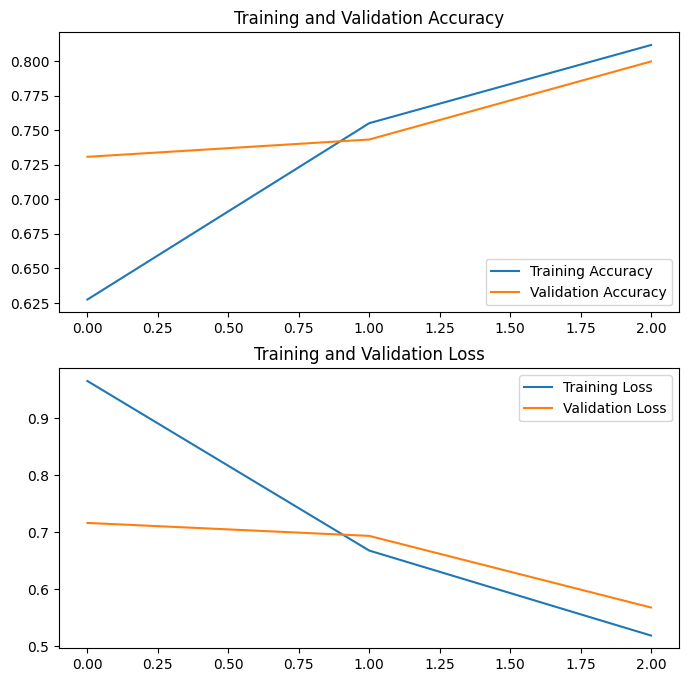

In [89]:
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']

loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Examine the results for some validation examples.

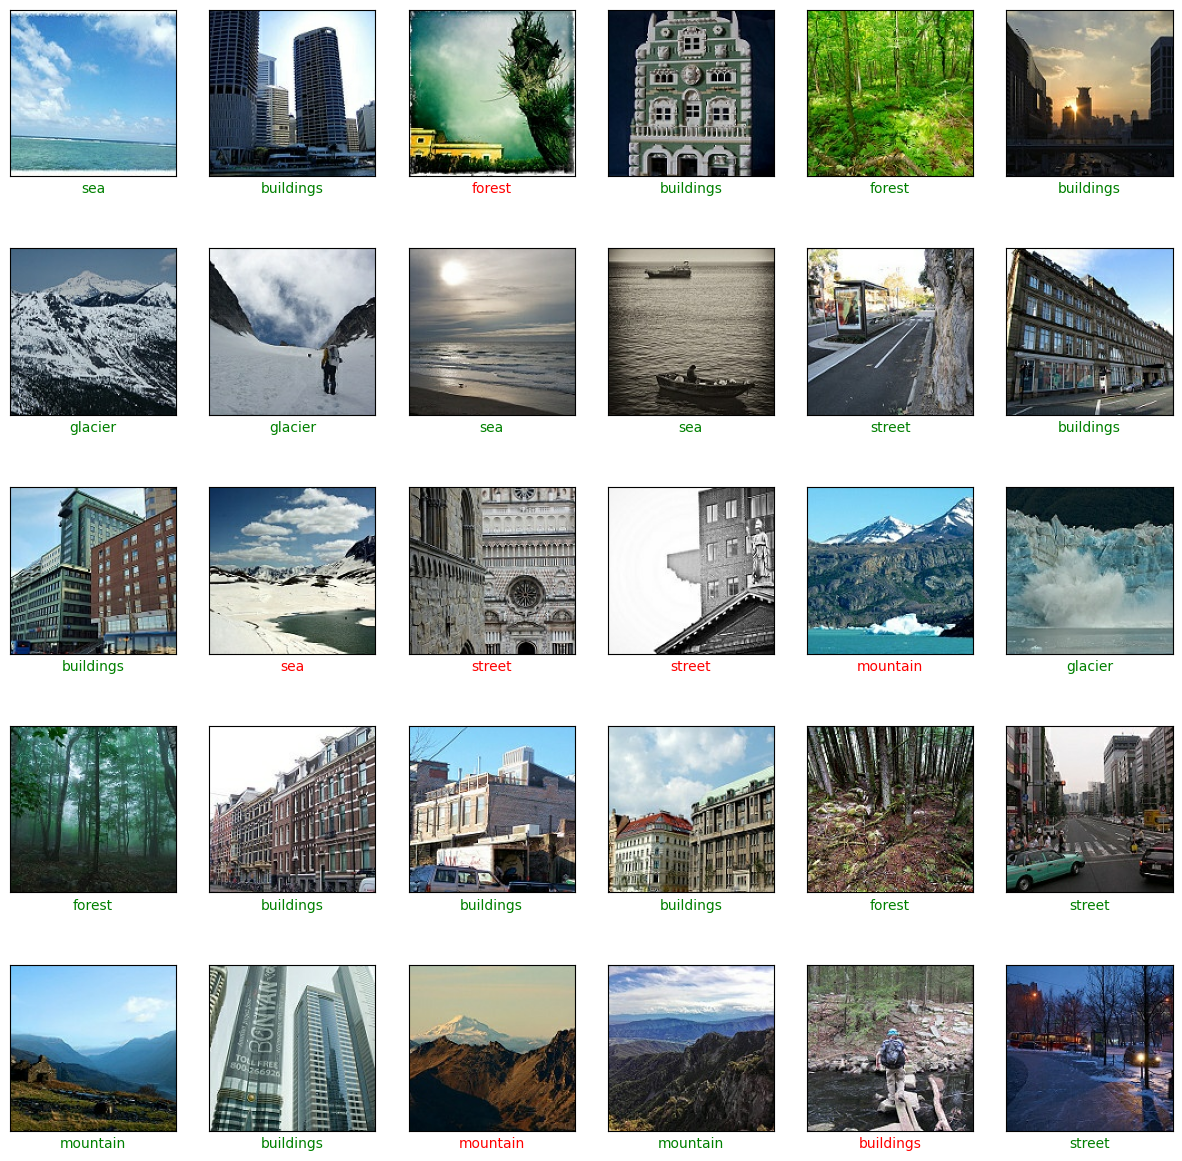

In [90]:
#Visualize 30 of the predicted data with green label for correct predictions
#and red label vise versa.
plt.figure(figsize=(15,15))
for images, labels in valid_dataset.take(1):
    for i in range(30):
        prediction = model8.predict(images[i].numpy().reshape(1,img_height, img_width,3), verbose=0)
        plt.subplot(5, 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.grid(False)
        xlabel = plt.xlabel(class_names[prediction.argmax()])
        if (prediction.argmax() == labels[i].numpy().argmax()):
            xlabel.set_color("green")
        else:
            xlabel.set_color("red")
plt.show()

### Make Predictions for Test_Pred data.  
#### Note: Results are stored in a dictionary, which is keyed by file numbers (as integers).

In [91]:
# Load the test_pred data (which has no target labels)
import os
import cv2

pred_directory = '../input/csc-578-hw7-fall-2023/test_pred'
result_dict = {} # dictionary to store predictions (keyed by file number)

print ("predicting for testset...")
# iterate over files in that directory
for filename in os.listdir(pred_directory):
    f = os.path.join(pred_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        fnum = int(filename[:-4]) # filename e.g. '103.jpg" -> 103
        img = cv2.imread(f)
        ### 11/3/2023 update -- NO further image normalization is necessary for the test data.
        ### img = img/255.0
        img = img.reshape(-1,img_height, img_width,3)
        pred = model8.predict(img, verbose=0)
        result_dict[fnum] = pred[0]  # [0] because there is only one data
print (f'  -- done, {len(result_dict)} test instances predicted.')

predicting for testset...
  -- done, 2993 test instances predicted.


In [87]:
import pandas as pd
data=pd.DataFrame.from_dict(result_dict,orient='index',columns=['buildings','forest','glacier','mountain','sea','street'])# converting the data into dataframe and adding the column names
data.reset_index(inplace=True)#resetting the index
data=data.rename(columns={'index':'fnum'})#the first index of the csv file which is a value used for sorting
data.sort_values(by=['fnum'], inplace = True)#sorting the values by fnum
data.to_csv('submission.csv',index=False)#to neglect the serial number the index is given false

In [88]:
# Load the CSV file into a DataFrame
data = pd.read_csv('submission.csv')

# Display the DataFrame
print(data)

       fnum  buildings    forest   glacier  mountain       sea    street
0     20056   0.000010  0.999908  0.000033  0.000009  0.000015  0.000025
1     20057   0.991177  0.000020  0.000138  0.000469  0.007132  0.001064
2     20058   0.007185  0.032969  0.087782  0.094586  0.770478  0.006998
3     20059   0.274537  0.018233  0.197710  0.020416  0.054769  0.434335
4     20060   0.027778  0.958884  0.000095  0.000105  0.000210  0.012928
...     ...        ...       ...       ...       ...       ...       ...
2988  24325   0.000650  0.000008  0.202177  0.008849  0.788209  0.000108
2989  24328   0.027731  0.013392  0.019668  0.198391  0.734743  0.006074
2990  24329   0.147408  0.009829  0.141574  0.414121  0.274413  0.012655
2991  24332   0.011437  0.382319  0.044303  0.011336  0.000213  0.550391
2992  24334   0.322639  0.000310  0.069850  0.339550  0.178771  0.088881

[2993 rows x 7 columns]


## (!!) Write the rest of the code by yourself.
### You must write the submission file, where the entries are sorted by the file number.